In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.colors
pal = ['#009473', '#00537c', '#b4b4b4', '#da3e21']
cmap = matplotlib.colors.ListedColormap(pal)
from plotly.subplots import make_subplots
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time
import plotly.graph_objects as go
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
np.random.seed(42)


In [2]:
df = pd.read_excel('marketing_campaign1.xlsx') 

In [3]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

In [4]:
df.tail()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
2235         1  2013-06-13       46       709  ...                  5   
2236         1  2014-06-10       56       406  ...                  7   
2237         0  2014-01-25       91       908  ...                  6   
2238         1  2014-01-24        8       428  ...                  3   
2239         1  2012-10-15       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[5 rows x 29 columns]

In [5]:
df.shape


(2240, 29)

In [6]:
df.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [8]:
df = df.rename(columns = {'MntWines' : 'Wines',
                          'MntFruits' : 'Fruits',
                          'MntMeatProducts' : 'Meat',
                          'MntFishProducts' : 'Fish',
                          'MntSweetProducts' : 'Sweets',
                          'MntGoldProds' : 'Gold'})
print(df.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')


In [9]:
#Lists of column names based on data type
numeric_columns = ['Income', 'Kidhome',
       'Teenhome', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

bool_columns = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response']

category_columns = ['Education', 'Marital_Status']

date_columns = ['Year_Birth', 'Dt_Customer']

In [10]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
Wines                   0
Fruits                  0
Meat                    0
Fish                    0
Sweets                  0
Gold                    0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<AxesSubplot:>

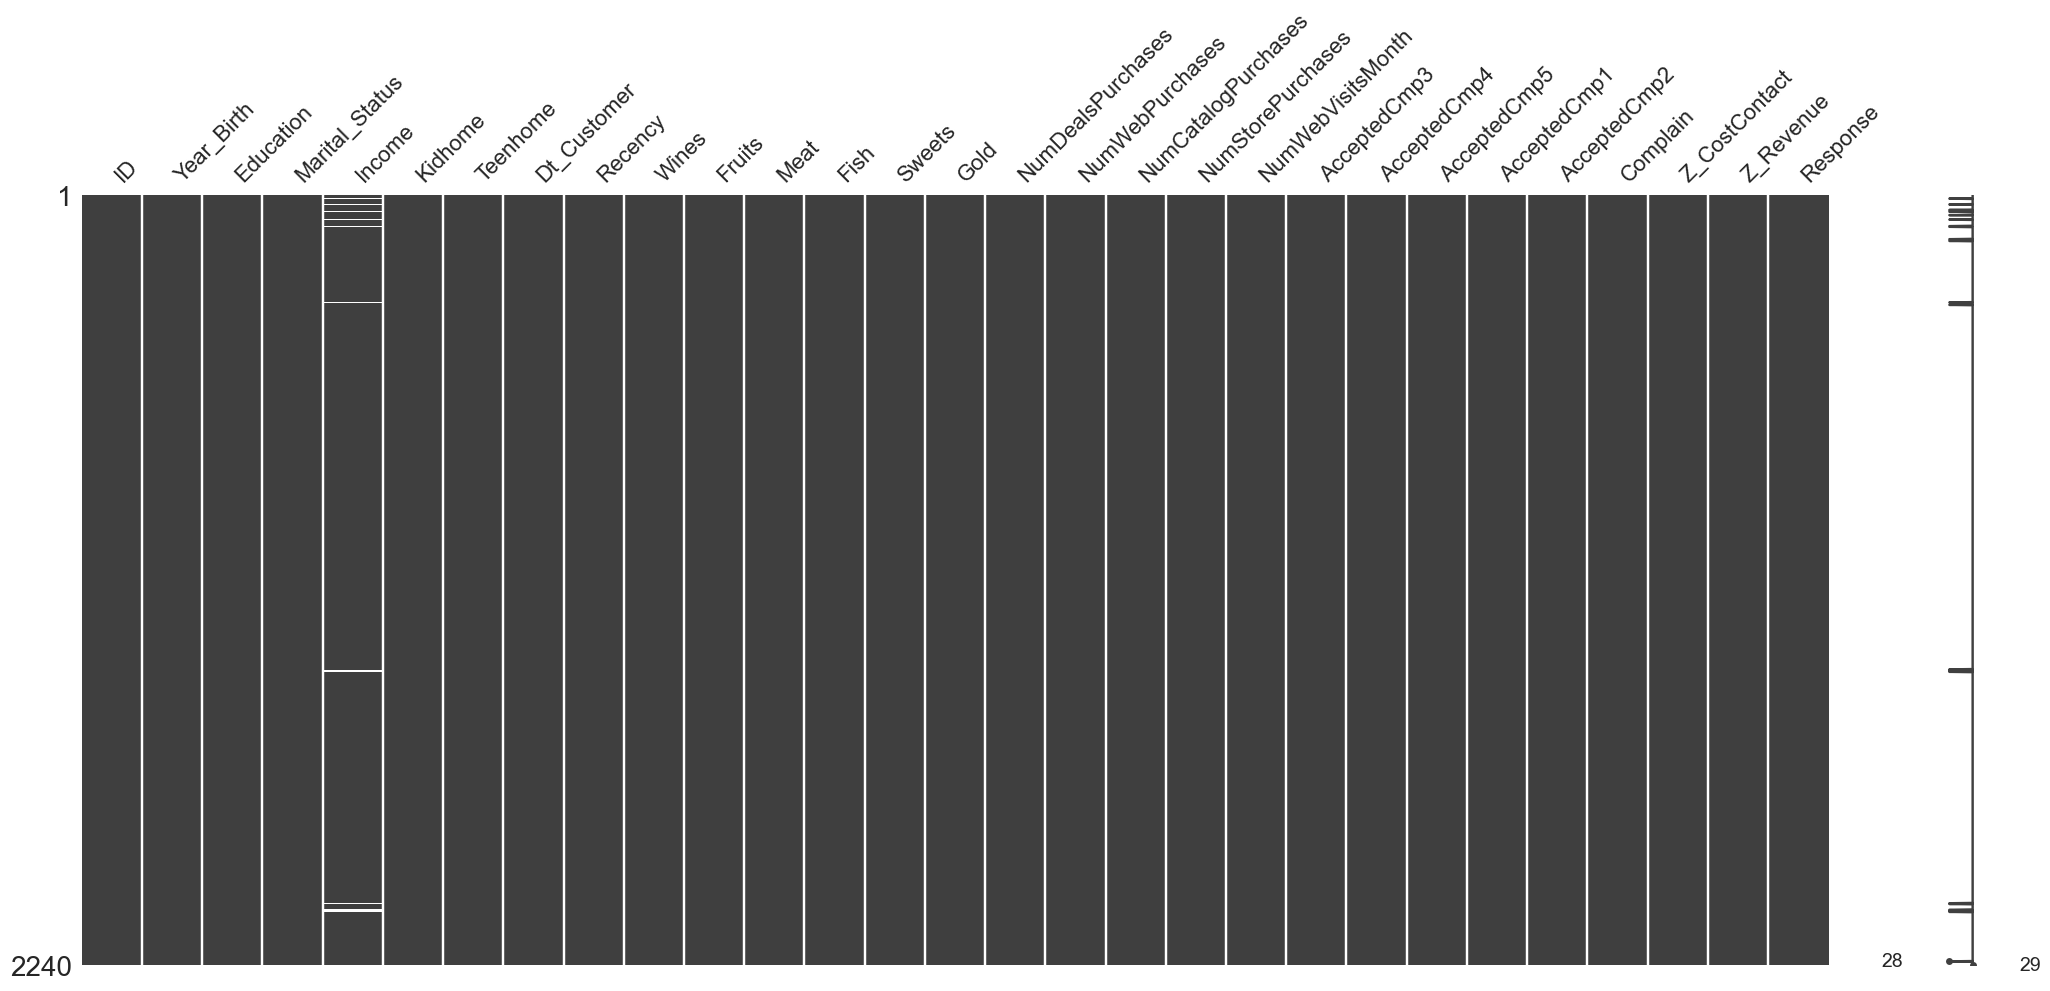

In [11]:
msno.matrix(df)

In [12]:
#Extract missing values of the 'Income' column
income_missing = df[df['Income'].isna()]
income_missing

ID  Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
10     1994        1983  Graduation        Married     NaN        1         0   
27     5255        1986  Graduation         Single     NaN        1         0   
43     7281        1959         PhD         Single     NaN        0         0   
48     7244        1951  Graduation         Single     NaN        2         1   
58     8557        1982  Graduation         Single     NaN        1         0   
71    10629        1973    2n Cycle        Married     NaN        1         0   
90     8996        1957         PhD        Married     NaN        2         1   
91     9235        1957  Graduation         Single     NaN        1         1   
92     5798        1973      Master       Together     NaN        0         0   
128    8268        1961         PhD        Married     NaN        0         1   
133    1295        1963  Graduation        Married     NaN        0         1   
312    2437        1989  Graduation        Married     NaN        0         0   
319    2863        1970  Graduation         Single     NaN        1         2   
1379  10475        1970      Master       Together     NaN        0         1   
1382   2902        1958  Graduation       Together     NaN        1         1   
1383   4345        1964    2n Cycle         Single     NaN        1         1   
1386   3769        1972         PhD       Together     NaN        1         0   
2059   7187        1969      Master       Together     NaN        1         1   
2061   1612        1981         PhD         Single     NaN        1         0   
2078   5079        1971  Graduation        Married     NaN        1         1   
2079  10339        1954      Master       Together     NaN        0         1   
2081   3117        1955  Graduation         Single     NaN        0         1   
2084   5250        1943      Master          Widow     NaN        0         0   
2228   8720        1978    2n Cycle       Together     NaN        0         0   

     Dt_Customer  Recency  Wines  ...  NumWebVisitsMonth  AcceptedCmp3  \
10    2013-11-15       11      5  ...                  7             0   
27    2013-02-20       19      5  ...                  1             0   
43    2013-11-05       80     81  ...                  2             0   
48    2014-01-01       96     48  ...                  6             0   
58    2013-06-17       57     11  ...                  6             0   
71    2012-09-14       25     25  ...                  8             0   
90    2012-11-19        4    230  ...                  9             0   
91    2014-05-27       45      7  ...                  7             0   
92    2013-11-23       87    445  ...                  1             0   
128   2013-07-11       23    352  ...                  6             0   
133   2013-08-11       96    231  ...                  4             0   
312   2013-06-03       69    861  ...                  3             0   
319   2013-08-23       67    738  ...                  7             0   
1379  2013-04-01       39    187  ...                  5             0   
1382  2012-09-03       87     19  ...                  5             0   
1383  2014-01-12       49      5  ...                  7             0   
1386  2014-03-02       17     25  ...                  7             0   
2059  2013-05-18       52    375  ...                  3             0   
2061  2013-05-31       82     23  ...                  6             0   
2078  2013-03-03       82     71  ...                  8             0   
2079  2013-06-23       83    161  ...                  6             0   
2081  2013-10-18       95    264  ...                  7             0   
2084  2013-10-30       75    532  ...                  1             0   
2228  2012-08-12       53     32  ...                  0             0   

      AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
10               0             0             0            

In [13]:
#Calculate the mean values of income grouped by education level
group_means = df.groupby('Education')['Income'].mean()

#Impute missing values in the "Income" column
df['Income'] = df['Income'].fillna(df['Education'].map(group_means))

In [14]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
Wines                  0
Fruits                 0
Meat                   0
Fish                   0
Sweets                 0
Gold                   0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [15]:
df[df.duplicated()].shape

(0, 29)

Feature Engineering

In [16]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format = '%d-%m-%Y')  

In [17]:
#Find the maximum (and minimum date to check) in the 'Dt_Customer' column
max_date = df['Dt_Customer'].max() 
min_date = df['Dt_Customer'].min()
print("The newest customer's enrolment date in the records:", max_date)
print("The oldest customer's enrolment date in the records:", min_date)

The newest customer's enrolment date in the records: 2014-06-29 00:00:00
The oldest customer's enrolment date in the records: 2012-07-30 00:00:00


In [18]:
#Calculate the number of days between the enrolment date and the maximum date
df['Days_since_enrolment'] = df['Dt_Customer'].apply(lambda x: (max_date - x).days) 

In [19]:
#Calculate age of customers
df['Age'] = 2023 - df['Year_Birth']

In [20]:
#Count values of categorical columns
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())

Values of Education levels:  Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Values of Marital Status:  Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64


In [21]:
#Group marital status into only two status 
df['Marital_Status'] = df['Marital_Status'].apply(lambda x: "Partner" if x in {"Married", "Together"} else "Alone")

In [22]:
#Segment education levels in three groups
df['Education'] = df['Education'].replace({'Basic' : 'Undergrade', 
                                           '2n Cycle' : 'Undergrade', 
                                           'Graduation' : 'Graduate', 
                                           'Master' : 'Postgraduate',
                                           'PhD' : 'Postgraduate'})


In [23]:
print('Values of Education levels: ', df['Education'].value_counts())
print('Values of Marital Status: ', df['Marital_Status'].value_counts())

Values of Education levels:  Graduate        1127
Postgraduate     856
Undergrade       257
Name: Education, dtype: int64
Values of Marital Status:  Partner    1444
Alone       796
Name: Marital_Status, dtype: int64


In [24]:
#Calculate the total children living the household
df['Children'] = df['Kidhome'] + df['Teenhome']



In [25]:
#Calculate the total members in the household
df['Family_Size'] = df['Marital_Status'].replace({"Alone" : 1, "Partner" : 2}) + df['Children']

In [26]:
#Check pertain parenthood
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

In [27]:
#Total spendings on various categories
df['Spent'] = df['Wines'] + df['Fruits'] + df['Meat'] + df['Fish'] + df['Sweets'] + df['Gold']

In [28]:
#Drop some of redundant attributes
to_drop = ['Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis = 1)

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2240 non-null   object 
 1   Marital_Status        2240 non-null   object 
 2   Income                2240 non-null   float64
 3   Kidhome               2240 non-null   int64  
 4   Teenhome              2240 non-null   int64  
 5   Recency               2240 non-null   int64  
 6   Wines                 2240 non-null   int64  
 7   Fruits                2240 non-null   int64  
 8   Meat                  2240 non-null   int64  
 9   Fish                  2240 non-null   int64  
 10  Sweets                2240 non-null   int64  
 11  Gold                  2240 non-null   int64  
 12  NumDealsPurchases     2240 non-null   int64  
 13  NumWebPurchases       2240 non-null   int64  
 14  NumCatalogPurchases   2240 non-null   int64  
 15  NumStorePurchases    

None

In the column Z_CostContact and Z_Revenue, there is only one value. These two columns are not going to contribute anything to the model building, thus we can drop them.

EDA

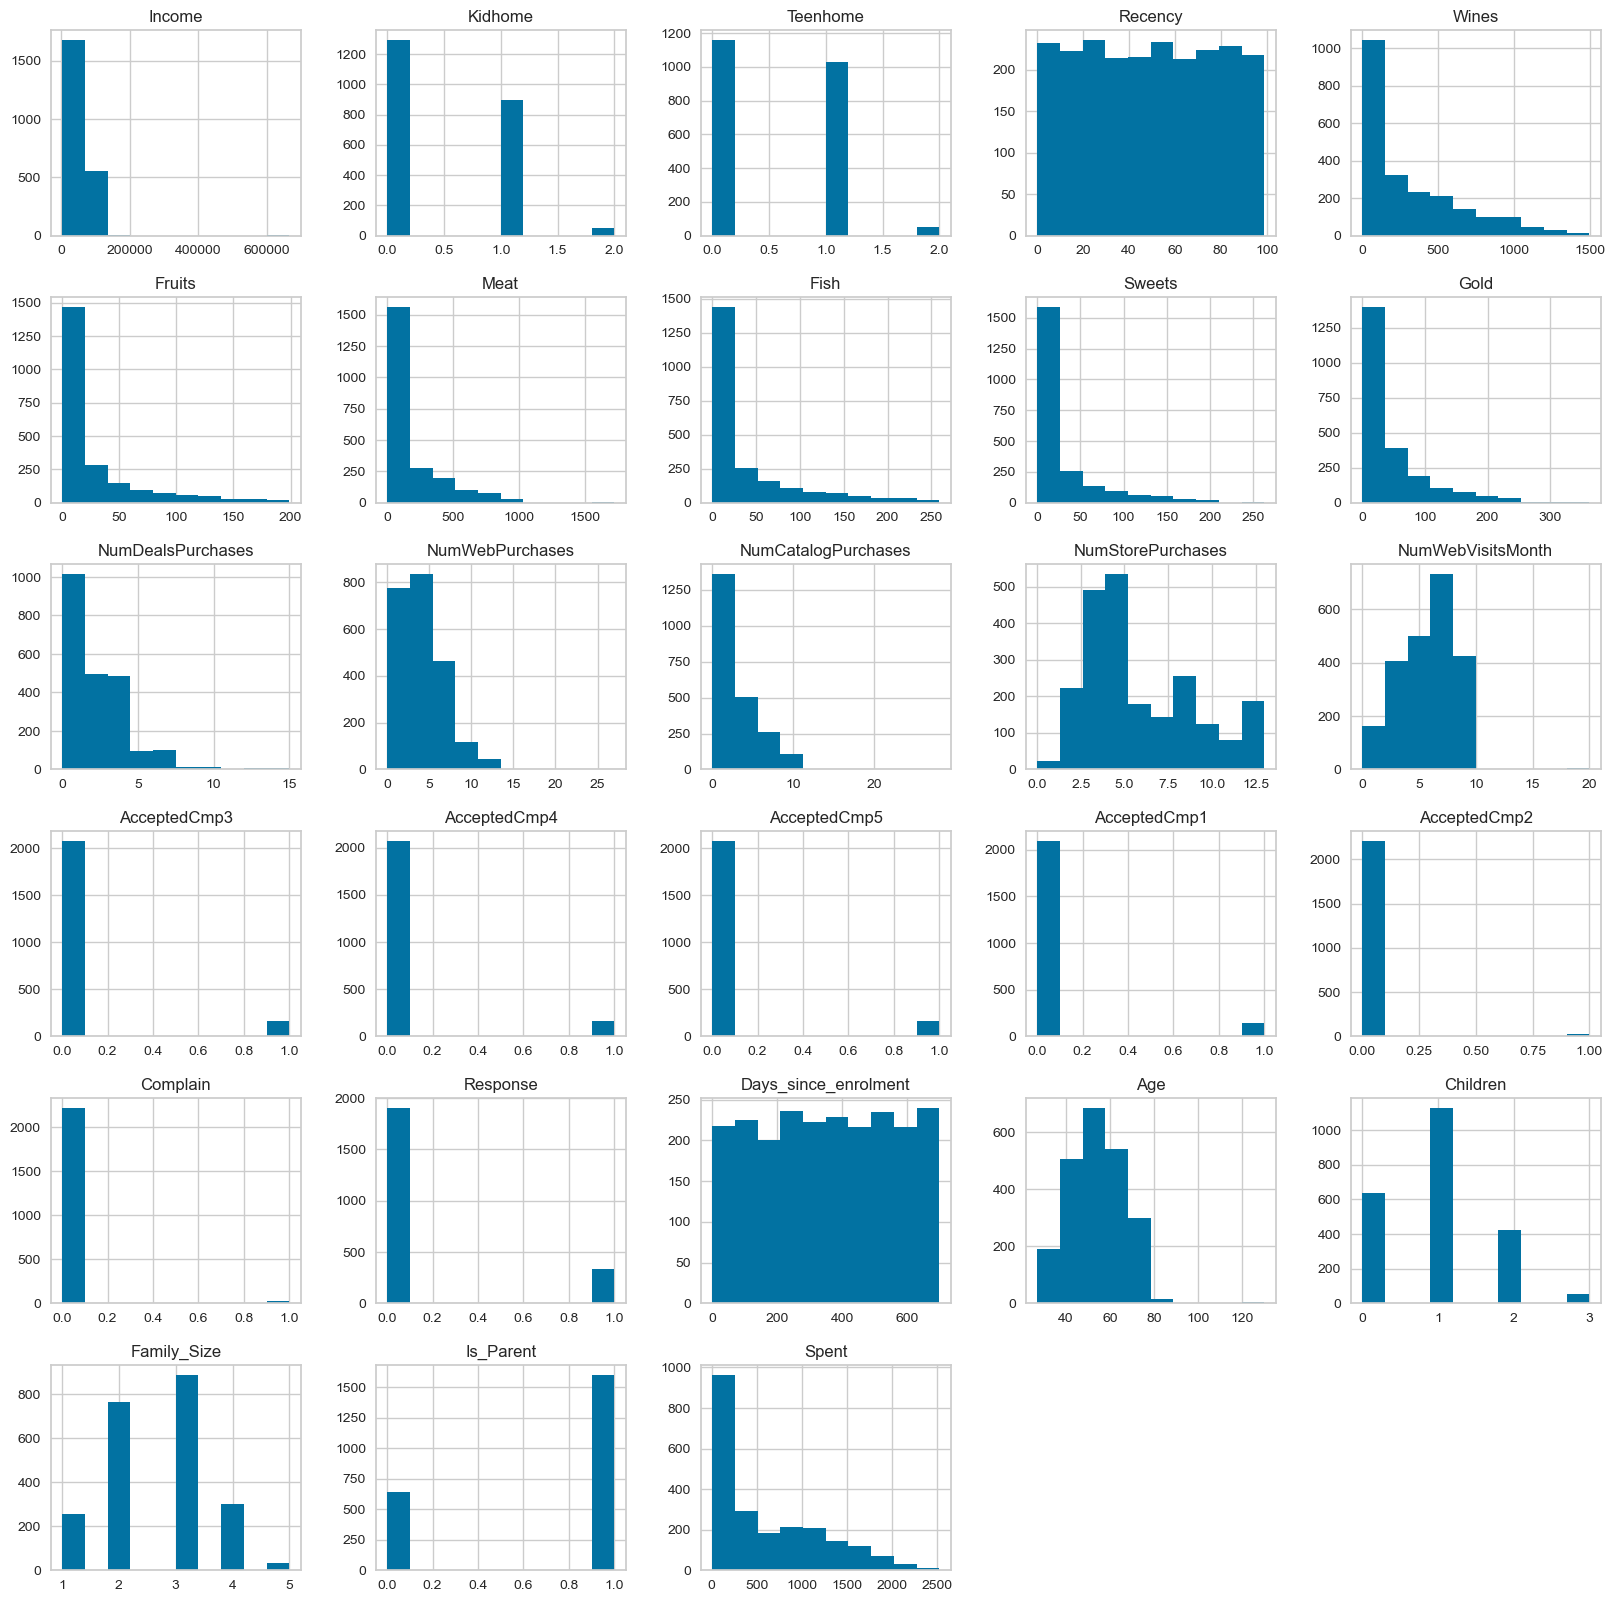

In [29]:
df.hist(figsize=(20,20))
plt.show()

Detecting Outliers

In [30]:
fig = make_subplots(rows=1, cols=3)

fig.add_trace(go.Box(y=df['Age'], notched=True, name='Age', marker_color = '#6699ff', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 2)

fig.add_trace(go.Box(y=df['Income'], notched=True, name='Income', marker_color = '#ff0066', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 1)

fig.add_trace(go.Box(y=df['Spent'], notched=True, name='Spent', marker_color = 'lightseagreen', 
                     boxmean=True, boxpoints='suspectedoutliers'), 1, 3)

fig.update_layout(title_text='<b>Box Plots for Numerical Variables<b>')

fig.show()

In [31]:
df= df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]
print('The total number of data points after removing outliers:', len(df))

The total number of data points after removing outliers: 2236


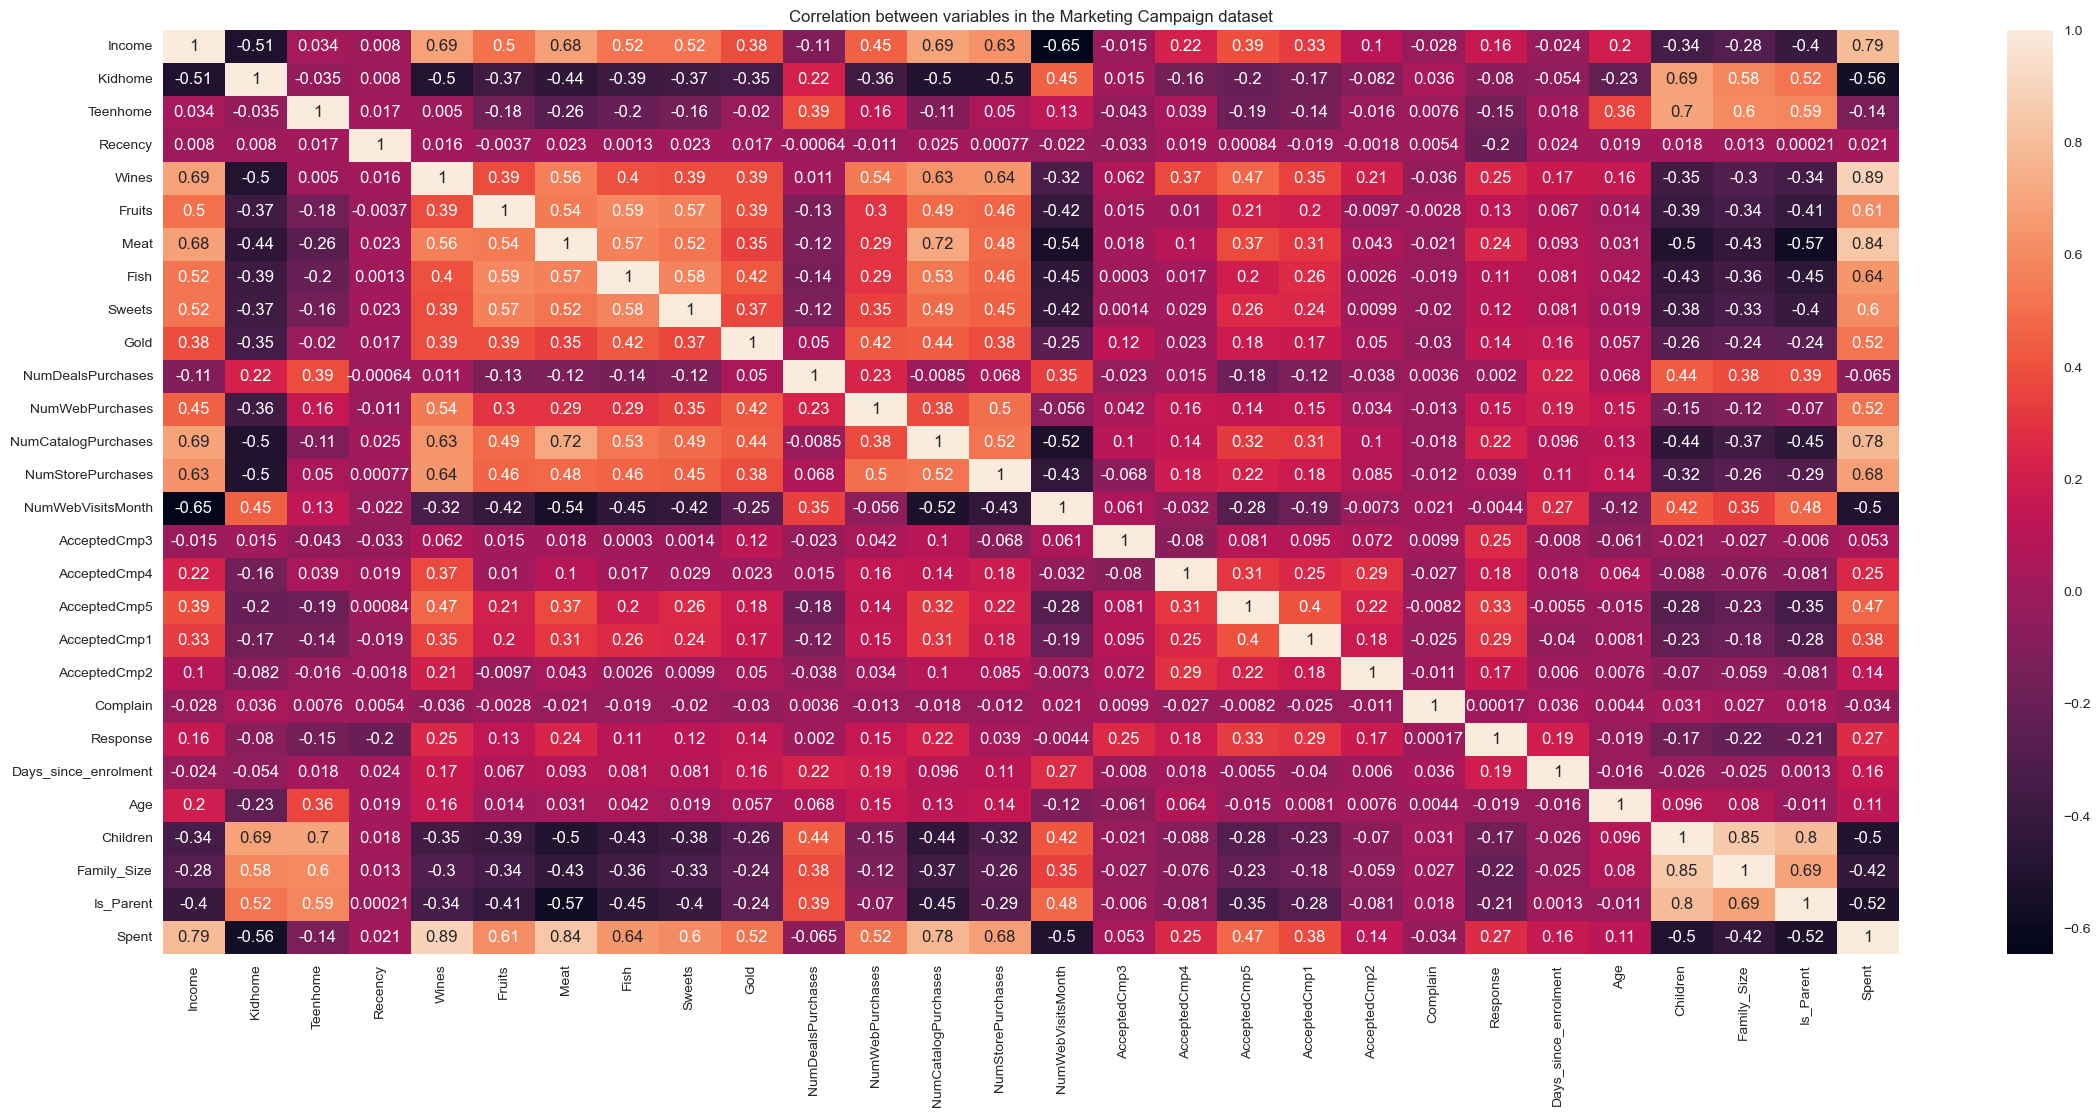

In [32]:
#Find the correlation between the variables
plt.figure(figsize=(28, 12))
sns.heatmap(df.corr(),
            annot = True)
plt.title('Correlation between variables in the Marketing Campaign dataset')
plt.show()

DATA PRE-PROCESSING

In [33]:
le = LabelEncoder()

#copy original dataset
ds = df.copy()
# select categorical columns
categorical_cols = ds.select_dtypes(include=['object']).columns.tolist()

# label encode each column in the list
for col in categorical_cols:
    ds[col] = le.fit_transform(ds[col])
    
print(ds.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Education             2236 non-null   int32  
 1   Marital_Status        2236 non-null   int32  
 2   Income                2236 non-null   float64
 3   Kidhome               2236 non-null   int64  
 4   Teenhome              2236 non-null   int64  
 5   Recency               2236 non-null   int64  
 6   Wines                 2236 non-null   int64  
 7   Fruits                2236 non-null   int64  
 8   Meat                  2236 non-null   int64  
 9   Fish                  2236 non-null   int64  
 10  Sweets                2236 non-null   int64  
 11  Gold                  2236 non-null   int64  
 12  NumDealsPurchases     2236 non-null   int64  
 13  NumWebPurchases       2236 non-null   int64  
 14  NumCatalogPurchases   2236 non-null   int64  
 15  NumStorePurchases    

In [34]:
ds.head()

Education  Marital_Status   Income  Kidhome  Teenhome  Recency  Wines  \
0          0               0  58138.0        0         0       58    635   
1          0               0  46344.0        1         1       38     11   
2          0               1  71613.0        0         0       26    426   
3          0               1  26646.0        1         0       26     11   
4          1               1  58293.0        1         0       94    173   

   Fruits  Meat  Fish  ...  AcceptedCmp1  AcceptedCmp2  Complain  Response  \
0      88   546   172  ...             0             0         0         1   
1       1     6     2  ...             0             0         0         0   
2      49   127   111  ...             0             0         0         0   
3       4    20    10  ...             0             0         0         0   
4      43   118    46  ...             0             0         0         0   

   Days_since_enrolment  Age  Children  Family_Size  Is_Parent  Spent  
0                   663   66         0            1          0   1617  
1                   113   69         2            3          1     27  
2                   312   58         0            2          0    776  
3                   139   39         1            3          1     53  
4                   161   42         1            3          1    422  

[5 rows x 30 columns]

In [35]:
#Get data for scaling by removing boolean columns
df_before_scale = ds.drop(bool_columns, axis = 1) #new data frame with numeric

scaler = StandardScaler()

# fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(df_before_scale)


# create a new dataframe with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_before_scale.columns)

df_scaled.head()

Education  Marital_Status    Income   Kidhome  Teenhome   Recency  \
0   -0.89438       -1.347635  0.288195 -0.824939 -0.930615  0.306856   
1   -0.89438       -1.347635 -0.262715  1.032627  0.905974 -0.383971   
2   -0.89438        0.742041  0.917627 -0.824939 -0.930615 -0.798467   
3   -0.89438        0.742041 -1.182829  1.032627 -0.930615 -0.798467   
4    0.57070        0.742041  0.295435  1.032627 -0.930615  1.550344   

      Wines    Fruits      Meat      Fish  ...  NumWebPurchases  \
0  0.983228  1.554170  1.679746  2.461068  ...         1.407639   
1 -0.871064 -0.636431 -0.713455 -0.650414  ...        -1.110921   
2  0.362159  0.572177 -0.177201  1.344595  ...         1.407639   
3 -0.871064 -0.560893 -0.651409 -0.503991  ...        -0.751127   
4 -0.389661  0.421101 -0.217088  0.154911  ...         0.328256   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0             2.509801          -0.552429           0.692865   
1            -0.568970          -1.167738          -0.131421   
2            -0.226884           1.293496          -0.543564   
3            -0.911056          -0.552429           0.280722   
4             0.115201           0.062879          -0.131421   

   Days_since_enrolment       Age  Children  Family_Size  Is_Parent     Spent  
0              1.529793  1.016868 -1.264308    -1.758810  -1.584362  1.680176  
1             -1.191143  1.273264  1.395139     0.445618   0.631169 -0.962202  
2             -0.206659  0.333146 -1.264308    -0.656596  -1.584362  0.282541  
3             -1.062517 -1.290693  0.065416     0.445618   0.631169 -0.918994  
4             -0.953679 -1.034298  0.065416     0.445618   0.631169 -0.305762  

[5 rows x 23 columns]

PCA

In [36]:
# Fit our standardized data using PCA
pca = PCA()

# Fit PCA on scaled data
pca.fit(df_scaled)

PCA()

In [37]:
# We choose 3 components
pca = PCA(n_components = 3)

# Fit the model with our data with the 3 selected components
pca.fit(df_scaled)

# The calculated resulting components scores for the elements in our data set:
df_pca = pca.transform(df_scaled)
df_pca = pd.DataFrame(df_pca, columns=['D1', 'D2', 'D3'])
df_pca


D1        D2        D3
0     4.983479 -0.146408  2.434167
1    -2.862899  0.024342 -1.554093
2     2.622236 -0.734972 -0.258656
3    -2.641833 -1.456471 -0.348365
4    -0.646292  0.174618 -0.115216
...        ...       ...       ...
2231  2.312048  2.434222  0.555281
2232 -3.098417  3.996647 -1.414510
2233  2.681520 -1.883289  0.500203
2234  1.489633  1.645567 -1.761027
2235 -2.726366  1.678690 -0.211237

[2236 rows x 3 columns]

In [38]:
#get PC loadings
loadings = pca.components_

#create a dataframe of PC loadings/scores
df_loadings = pd.DataFrame(loadings.T)

# 16 PCs scores with 23 col names
df_loadings.insert(0, 'col_name', df_before_scale.columns)
df_loadings

col_name         0         1         2
0              Education -0.026687 -0.055792  0.020371
1         Marital_Status -0.027268  0.122899 -0.264938
2                 Income  0.278027  0.162755 -0.214562
3                Kidhome -0.245937  0.015394  0.054193
4               Teenhome -0.099334  0.453172 -0.196792
5                Recency  0.004082  0.018433 -0.018549
6                  Wines  0.255767  0.203399  0.072307
7                 Fruits  0.239204  0.022400 -0.000839
8                   Meat  0.283996  0.007488 -0.030727
9                   Fish  0.249330  0.013504 -0.001497
10                Sweets  0.236894  0.036690  0.004395
11                  Gold  0.188838  0.141647  0.179800
12     NumDealsPurchases -0.077688  0.366153  0.290878
13       NumWebPurchases  0.166556  0.300416  0.238344
14   NumCatalogPurchases  0.277033  0.105565 -0.032127
15     NumStorePurchases  0.241360  0.204138  0.000251
16     NumWebVisitsMonth -0.225412  0.072867  0.453627
17  Days_since_enrolment  0.031461  0.133275  0.562041
18                   Age  0.037176  0.214803 -0.273914
19              Children -0.247971  0.339124 -0.103687
20           Family_Size -0.219927  0.345926 -0.225690
21             Is_Parent -0.243052  0.294702  0.002062
22                 Spent  0.320548  0.134033  0.044578

The variables Income and Spent make the most significant contribution to PC1. The variables Teenhome, Children, Family_Size, and Is_Parent are the primary contributors to PC2.

Elbow Method to determine the number of clusters to be formed:


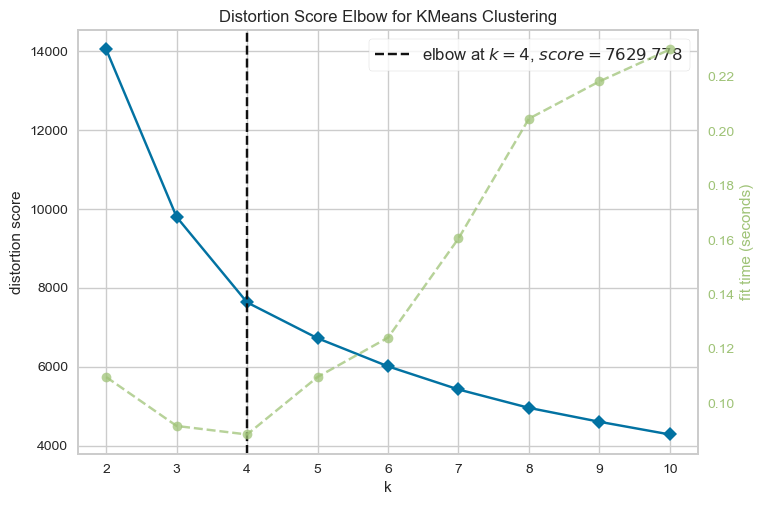

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

Based on the above plot, it appears that the optimal number of clusters for this dataset is 4.

 Find the best clustering method

In [40]:
# Define clustering methods
clustering_methods = [cluster.KMeans,
                      cluster.AgglomerativeClustering,
                      cluster.MeanShift,
                      cluster.AffinityPropagation,
                      cluster.SpectralClustering,
                      cluster.Birch
                     ]

data_arg = [(),(),(),(),(),(),()]

In [41]:
# Define parameters for each clustering method
clustering_para = [{'n_clusters':4},
                   {'n_clusters':4, 'linkage':'ward'},
                   {'cluster_all':False},
                   {'damping' : 0.9},
                   {'n_clusters':4},
                   {'threshold' : 0.01, 'n_clusters':4}
                  ]

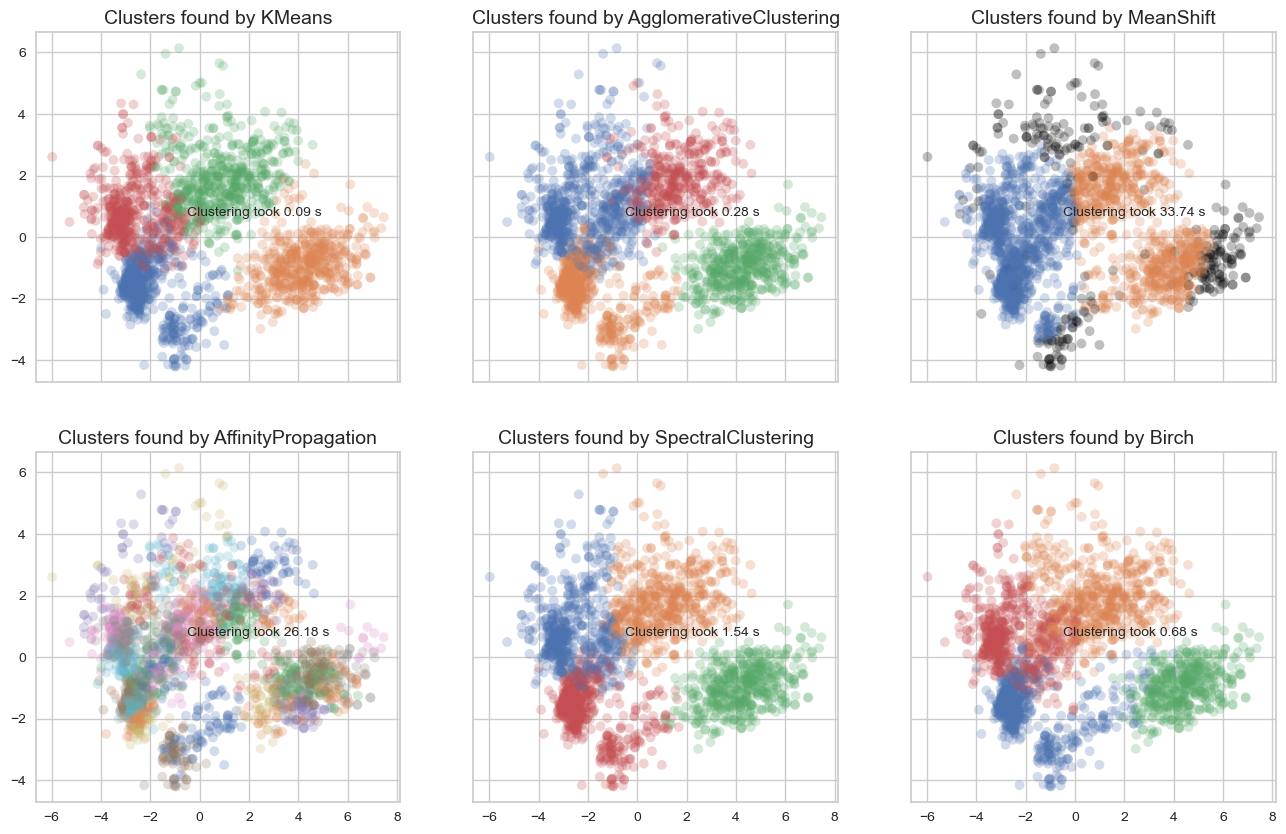

In [42]:
plot_kwds = {'alpha' : 0.25, 's' : 50, 'linewidths':0}
clusters_series = []

def plot_clusters(data, algorithms, args, kwds, axs):
    for j, i in enumerate(axs):
        algorithm = algorithms[j]
        start_time = time.time()
        labels = algorithm(*args[j], **kwds[j]).fit_predict(data)
        end_time = time.time()
        clusters_series.append(labels)

        #plotting
        palette = sns.color_palette('deep', np.unique(labels).max() + 1)
        colors = [palette[x] if x >= 0 else (0.0, 0.0, 0.0) for x in labels]        
        i.scatter(data.iloc[:,0], data.iloc[:,1],c=colors,  **plot_kwds)
        i.set_title('Clusters found by {}'.format(str(algorithm.__name__)), fontsize=14)
        i.text(-0.5, 0.7, 'Clustering took {:.2f} s'.format(end_time - start_time), fontsize=10)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 10), sharex=True, sharey=True)
axs = axs.flatten()


plot_clusters(data=df_pca, 
              algorithms=clustering_methods, 
              args=data_arg, 
              kwds=clustering_para, 
              axs=axs)

In [43]:
X = df_pca
# Compute the silhouette score for each method
for method, params in zip(clustering_methods, clustering_para):
    model = method(**params)
    y_pred = model.fit_predict(X)
    score = silhouette_score(X, y_pred)
    print(f"Silhouette score for {type(model).__name__}: {score:.3f}")

Silhouette score for KMeans: 0.374
Silhouette score for AgglomerativeClustering: 0.333
Silhouette score for MeanShift: 0.338
Silhouette score for AffinityPropagation: 0.266
Silhouette score for SpectralClustering: 0.367
Silhouette score for Birch: 0.347


Plot clusters of Kmeans clustering

In [44]:
#Choose KMeans method from clusters series above
df['Clusters'] = clusters_series[0]

EVALUATION MODELS

As this is an unsupervised clustering process, there is no labeled feature to use for evaluating or scoring our model. Instead, the goal of this section is to examine the patterns within the formed clusters and understand their nature. To achieve this, we will conduct exploratory data analysis to examine the data in relation to the clusters and draw conclusions from our observations. To begin, we will examine the distribution of groups within the clusters.

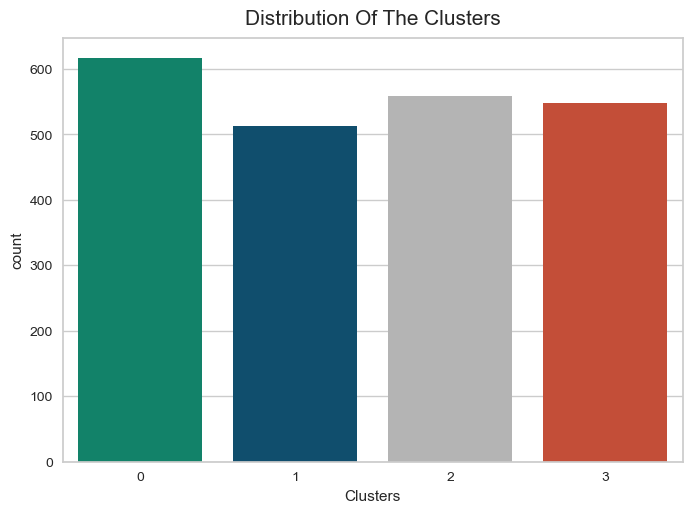

In [45]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters", pad=10, size = 15)
plt.show()

Clusters based on Income and Total Spent

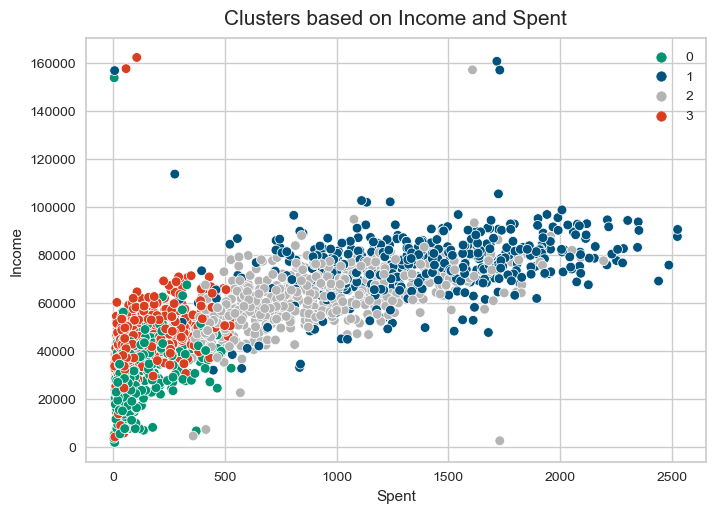

In [46]:
pl = sns.scatterplot(data = df, x = df['Spent'], y = df['Income'], hue = df['Clusters'], palette = pal)
pl.set_title('Clusters based on Income and Spent', pad=10, size=15)
plt.legend()
plt.show()

In [47]:
#Define name of customer groups according to clusters
re_clust = {
    0: 'Ordinary customer',
    1: 'Elite customer',
    2: 'Good customer',
    3: 'Potential good customer'}
df['Clusters_Customers'] = df['Clusters'].map(re_clust)

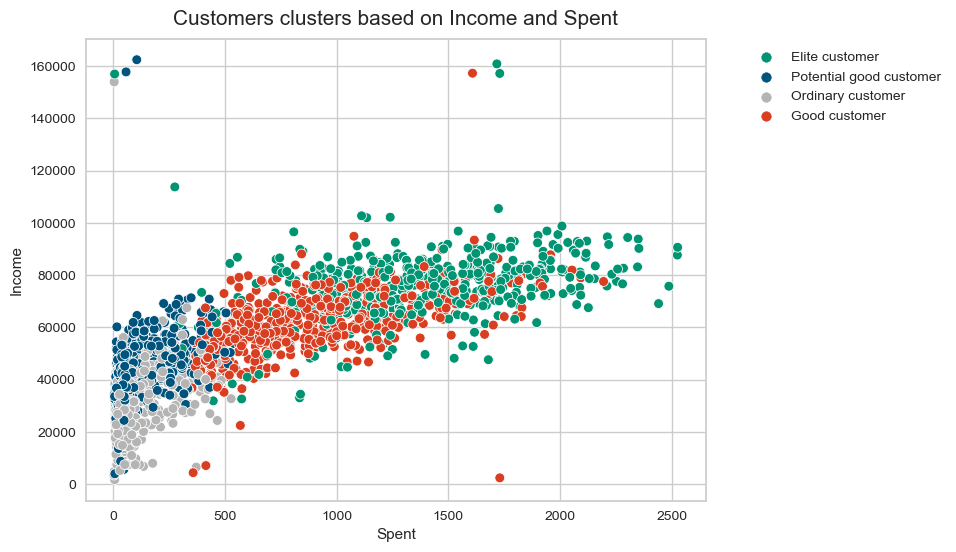

In [48]:
#Plot clusters of customers based on Income and Spent
plt.figure(figsize=(8, 6))
pl = sns.scatterplot(data = df, x = df['Spent'], y = df['Income'], hue = df['Clusters_Customers'], palette = pal, s=50)
pl.set_title('Customers clusters based on Income and Spent', pad=10, size=15)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1))
plt.show()
plt.show()

In [49]:
#Calculate spending of different products of each customer group

#Group by clusters_customers and calculate total amount of spending by each product
spending_by_product = df.groupby('Clusters_Customers')[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']].sum()

#Transpose the result
spending_by_product = spending_by_product.transpose()

#Reset the index 
spending_by_product = spending_by_product.reset_index()


In [50]:
#Rename column
spending_by_product = spending_by_product.rename(columns = {'index': 'Category'})

spending_by_product

Clusters_Customers Category  Elite customer  Good customer  Ordinary customer  \
0                     Wines          311717         296082              21566   
1                    Fruits           33061          19127               4078   
2                      Meat          238063         102359              15992   
3                      Fish           48808          25407               6229   
4                    Sweets           33576          20469               4131   
5                      Gold           37791          40503              11186   

Clusters_Customers  Potential good customer  
0                                     50664  
1                                      2487  
2                                     16961  
3                                      3487  
4                                      2376  
5                                      8866

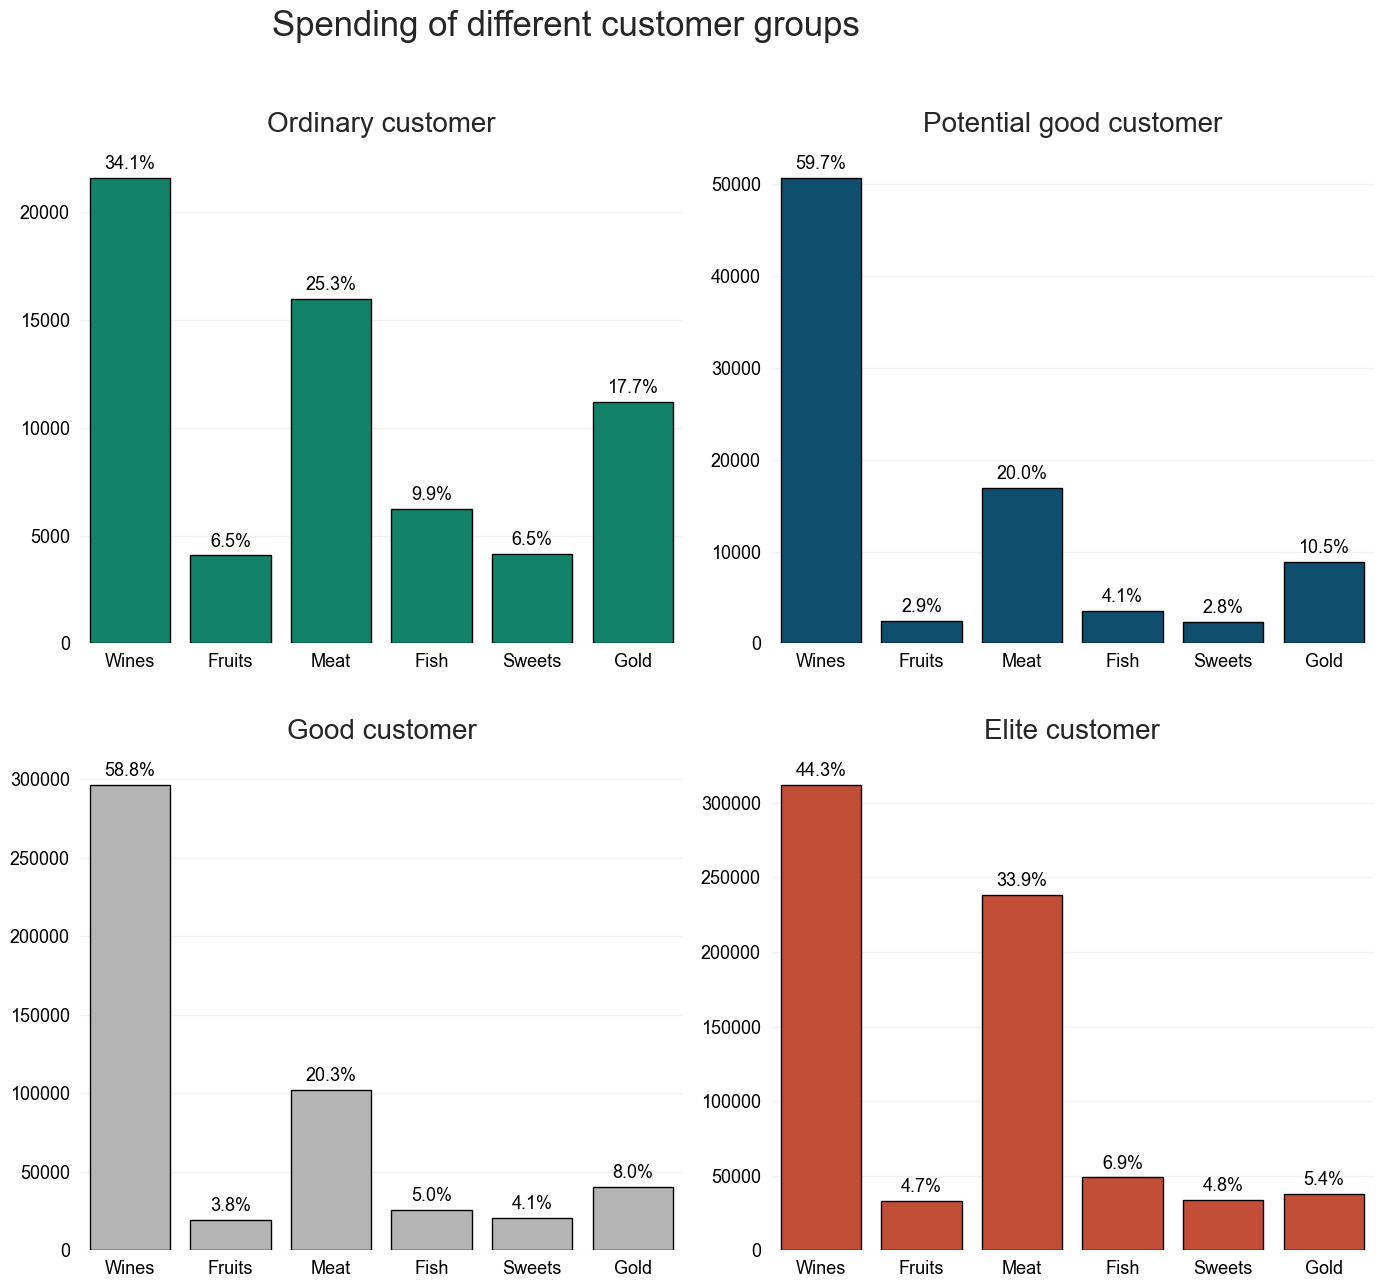

In [51]:
# Plot bar charts
#Creates a figure with 4 subplots using the subplots() function from matplotlib
fig = plt.figure(figsize=(14, 12)) 

#Initializes k=1 and creates a list cl of strings representing the names of each customer cluster
k = 1
cl = ['Ordinary customer', 'Potential good customer', 'Good customer', 'Elite customer']
for i in cl:
    #only the columns Category and i are selected, where i is the current iteration of the cl list 
    ass = spending_by_product[['Category', i]]
    
    #create a subplot in a grid with 2 rows and 2 columns, and it sets the current subplot to the k position
    plt.subplot(2, 2, k)
    plt.title(i, size = 20, x = 0.5, y = 1.03)
    plt.grid(color = 'gray', linestyle = '-', axis = 'y', alpha = 0.1)
    cluster_color = pal[k-1]
    #create barplot using seaborn where x is products in the category, y is the current iteration of the cl list
    a = sns.barplot(data = ass, x = 'Category', y = i, color = cluster_color, linestyle = "-", linewidth = 1, edgecolor = "black")
    plt.xticks(size = 13, color = 'black')
    plt.yticks(size = 13, color = 'black')
    plt.xlabel('')
    plt.ylabel('')
 #add annotations to the barplot by percentage of spending amount
    for p in a.patches:
        #set the x-coordinate to the center of the current bar patch
        x_pos = p.get_x() + p.get_width() / 2
        
        #get the height of the current patch
        y_pos = p.get_height()
        #calculate percentage of spending amount (current patch) and the total spending of the group
        percentage = round((y_pos / sum(ass[i])) * 100, 1)
        a.annotate(
            f'{percentage}%', #text to be displayed
            xy=(x_pos, y_pos), #position to be placed
            ha='center', va='center', #alignment of the text
            size=13, 
            color='black',
            xytext = (0, 10), 
            textcoords = 'offset points')
    #hide spines of the barplot (the right, top, left and bottom borders)
    for spine in ['right', 'top', 'left', 'bottom']:
        a.spines[spine].set_visible(False)
        
    #increment k after iteration of the loop
    k += 1

plt.figtext(0.2, 1.05, 'Spending of different customer groups', size = 25)
fig.tight_layout(h_pad = 3)
plt.show()

 Clusters based on Promotions

In [52]:
#Creating a feature to get a sum of accepted promotions 
df["Total_Promos"] = df["AcceptedCmp1"]+ df["AcceptedCmp2"]+ df["AcceptedCmp3"]+ df["AcceptedCmp4"]+ df["AcceptedCmp5"]

# Group the data by cluster and sum the total number of promotions accepted
cluster_promos = df.groupby('Clusters_Customers')[['Total_Promos']].sum().reset_index()

# Calculate the percentage of promotions accepted for each cluster
cluster_promos['Percentage_Promos'] = round(cluster_promos['Total_Promos']*100/ cluster_promos['Total_Promos'].sum(), 2)

cluster_promos

Clusters_Customers  Total_Promos  Percentage_Promos
0           Elite customer           378              56.76
1            Good customer           178              26.73
2        Ordinary customer            55               8.26
3  Potential good customer            55               8.26

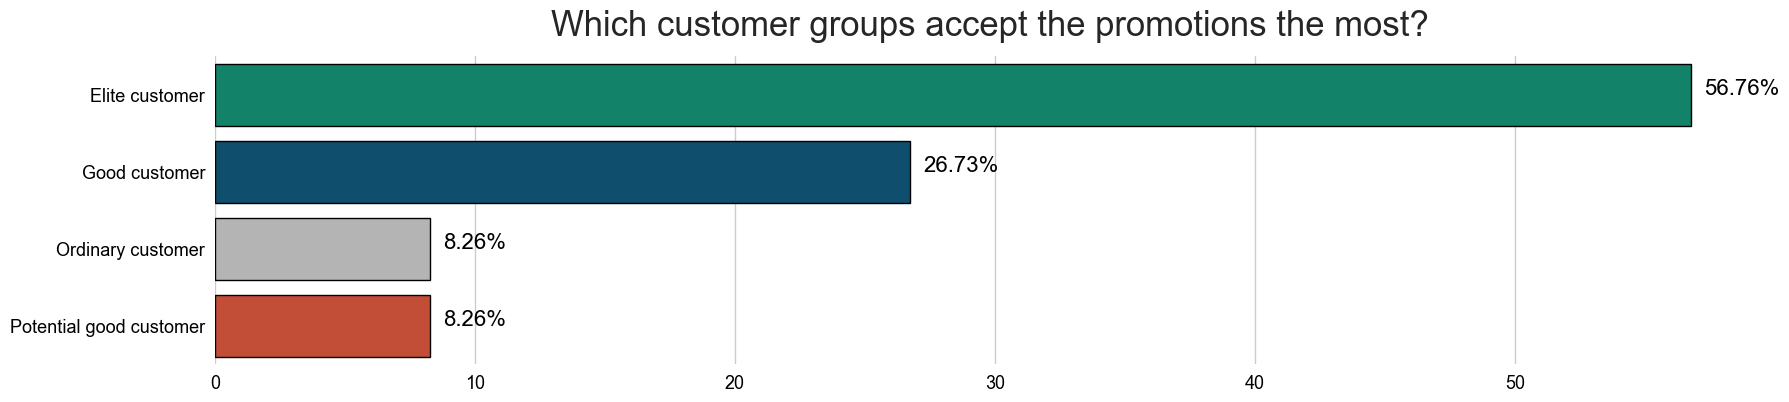

In [53]:
fig = plt.figure(figsize = (20, 4))

# create barplot using seaborn where x is products in the category, y is the current iteration of the cl list
a = sns.barplot(data=cluster_promos, x='Percentage_Promos', y='Clusters_Customers', 
                palette=pal, linestyle="-", linewidth=1, edgecolor="black")
plt.xticks(size=13, color='black')
plt.yticks(size=13, color='black')
plt.title('Which customer groups accept the promotions the most?', pad=15, size=25)
plt.xlabel('')
plt.ylabel('')

# add annotations to the barplot
for i, v in enumerate(cluster_promos['Percentage_Promos']):
    a.text(v + 0.5, i, (str(v)+"%"), color='black', fontsize=16)
    
for j in ['right', 'top', 'left', 'bottom']:
    a.spines[j].set_visible(False)

plt.show()


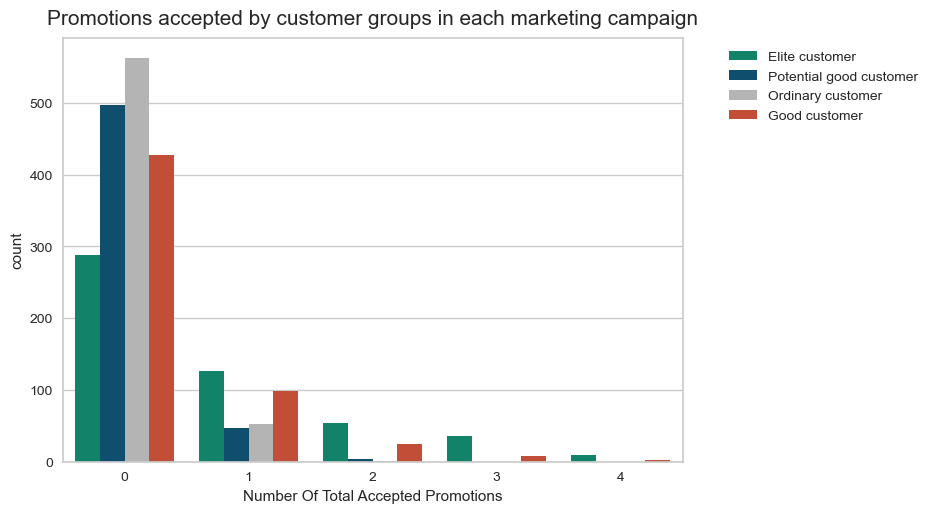

In [54]:
plt.figure()
pl = sns.countplot(x=df["Total_Promos"],hue=df["Clusters_Customers"], palette= pal)
pl.set_title("Promotions accepted by customer groups in each marketing campaign", pad=10, size=15)
pl.set_xlabel("Number Of Total Accepted Promotions")
plt.legend(loc = 'upper right', bbox_to_anchor=(1.4, 1))
plt.show()

Clusters based on Number of Deals Purchased

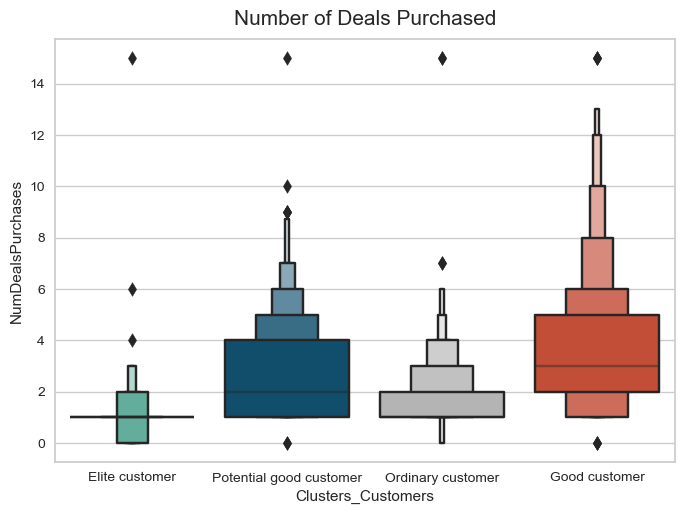

In [55]:
plt.figure()
pl=sns.boxenplot(x=df["Clusters_Customers"], y=df["NumDealsPurchases"], palette= pal)
pl.set_title("Number of Deals Purchased", pad=10, size=15)
plt.show()

<Figure size 800x550 with 0 Axes>

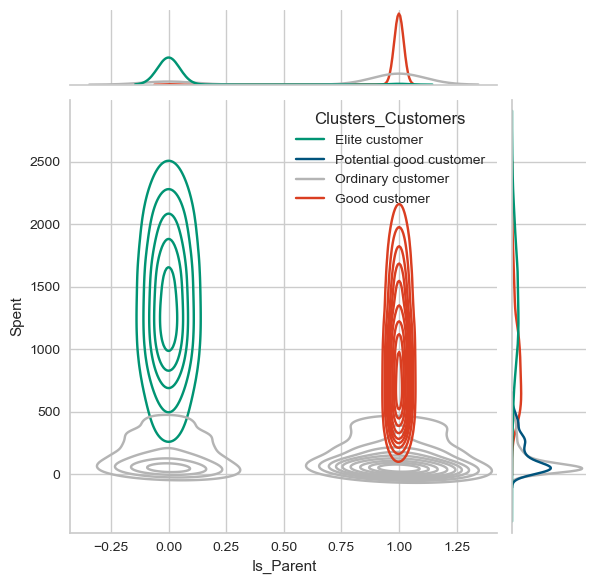

<Figure size 800x550 with 0 Axes>

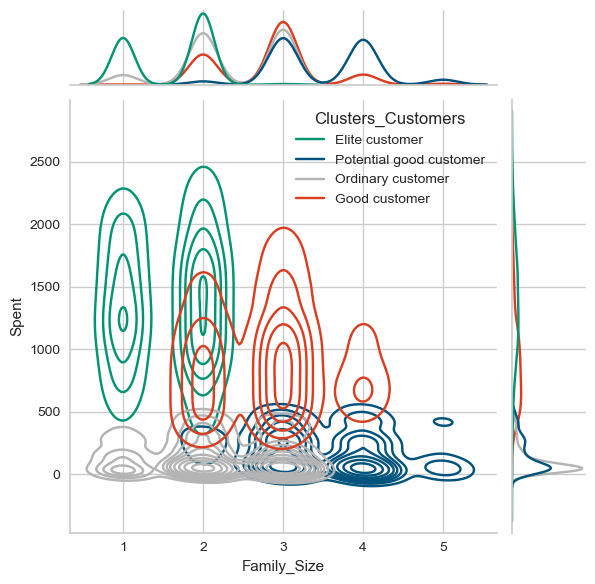

<Figure size 800x550 with 0 Axes>

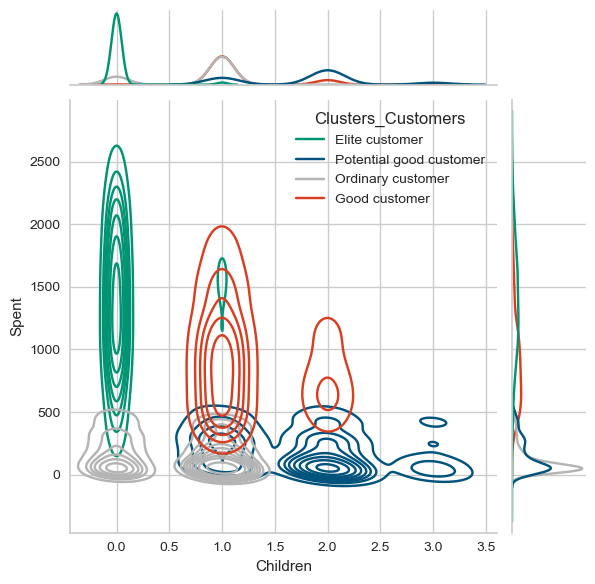

<Figure size 800x550 with 0 Axes>

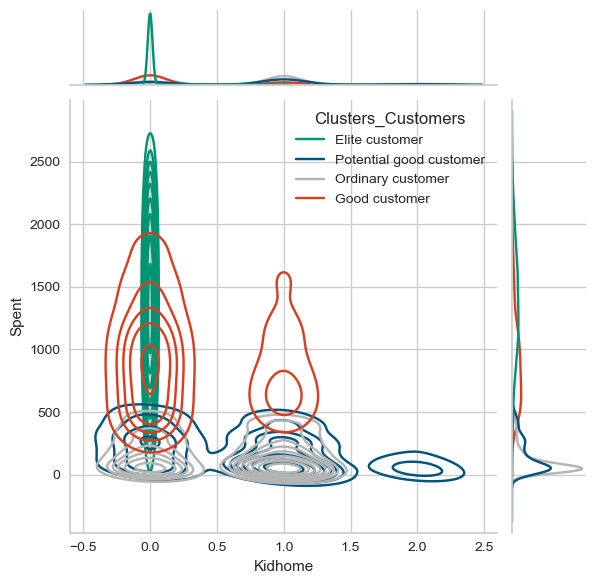

<Figure size 800x550 with 0 Axes>

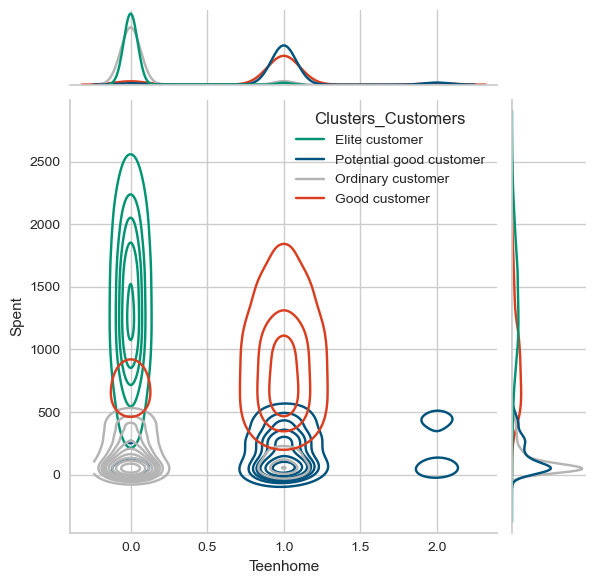

<Figure size 800x550 with 0 Axes>

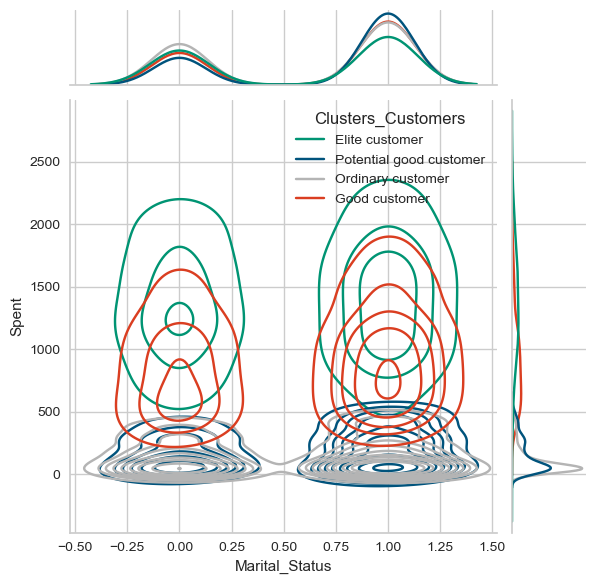

<Figure size 800x550 with 0 Axes>

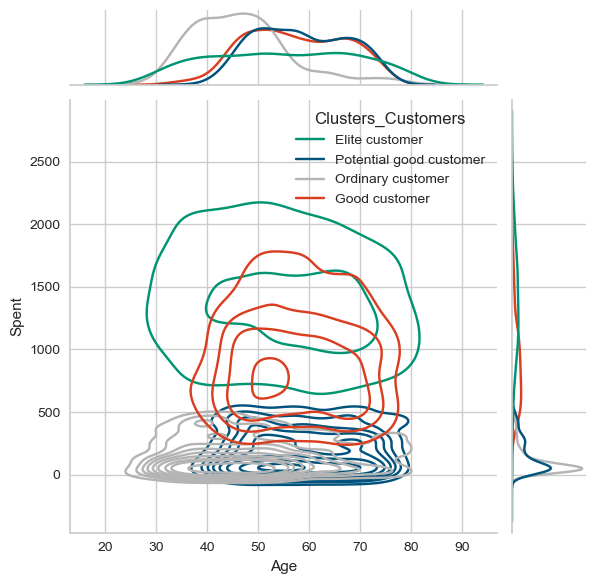

<Figure size 800x550 with 0 Axes>

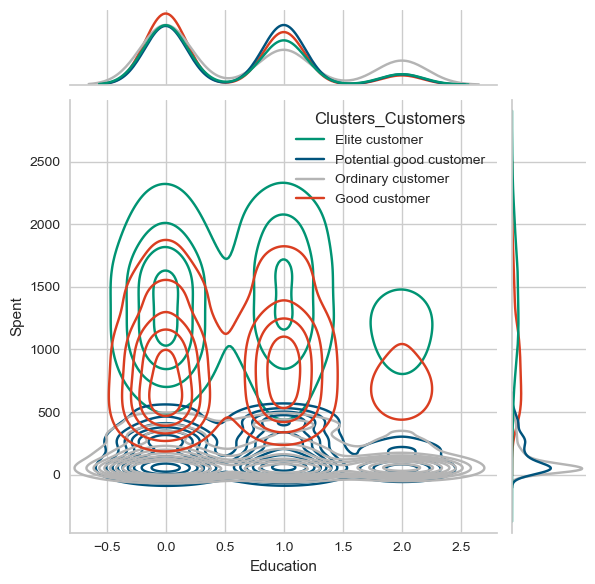

In [56]:
Personal = ["Is_Parent", "Family_Size", "Children", "Kidhome","Teenhome",
            "Marital_Status", "Age", "Education"]

for i in Personal:
    plt.figure()
    sns.jointplot(x=ds[i], y=df["Spent"], hue =df["Clusters_Customers"], kind="kde", palette=pal)
    plt.show()

In [57]:
'''Personal = ["Is_Parent", "Family_Size", "Children", "Kidhome","Teenhome",
            "Marital_Status", "Education"]



_, ax1 = plt.subplots(4,2, figsize=(25,22))

for i, col in enumerate(Personal):
    sns.barplot(x='Clusters', y='Spent', data=df, ax=ax1[i//2, i%2],hue=col,palette=pal)
_.delaxes(ax= ax1[3,1])   
plt.show()'''


'Personal = ["Is_Parent", "Family_Size", "Children", "Kidhome","Teenhome",\n            "Marital_Status", "Education"]\n\n\n\n_, ax1 = plt.subplots(4,2, figsize=(25,22))\n\nfor i, col in enumerate(Personal):\n    sns.barplot(x=\'Clusters\', y=\'Spent\', data=df, ax=ax1[i//2, i%2],hue=col,palette=pal)\n_.delaxes(ax= ax1[3,1])   \nplt.show()'

Deployment